In [1]:
import pandas as pd
import numpy as np
np.seterr(invalid='ignore')
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
pd.options.display.max_columns = 999

In [25]:
file_path = 'Nuggets/!season_totals/Nuggets/Offense/Team.json'
defense_path = 'Nuggets/11.06.23_Pelicans/Nuggets/Defense/Team.json'

opp_off_path = 'Nuggets/11.06.23_Pelicans/Pelicans/Offense/Team.json'
opp_def_path = 'Nuggets/11.06.23_Pelicans/Pelicans/Defense/Team.json'

player_path = 'Nuggets/11.06.23_Pelicans/Pelicans/Offense/Brandon Ingram.json'
player_def_path = 'Nuggets/11.06.23_Pelicans/Nuggets/Defense/Peyton Watson.json'

with open (file_path, 'r') as f:
    offense_file = json.load(f)
    
with open (defense_path, 'r') as d:
    defense_file = json.load(d)
    
with open (opp_off_path, 'r') as o:
    opp_off_file = json.load(o)
    
with open (opp_def_path, 'r') as r:
    opp_def_file = json.load(r)
    
with open (player_path, 'r') as p:
    player_off_file = json.load(p)
    
with open (player_def_path, 'r') as t:
    player_def_file = json.load(t)
    
print(offense_file.keys())

dict_keys(['ovr_data', 'SMZ2', 'Rim', '3ptZ4', '3ptZ3', 'LMZ3', '3ptZ2', 'SMZ3', '3ptZ1', '3ptZ5', 'LMZ4', 'SMZ1', 'LMZ5', 'LMZ2', 'LMZ1', 'SMZ1 '])


In [26]:
data_PPP = offense_file['ovr_data']['data']
data_PPP = pd.DataFrame(data_PPP).transpose()
data_PPP = PPP(data_PPP)

rim_PPP = offense_file['Rim']['data']
rim_PPP = pd.DataFrame(rim_PPP).transpose()
rim_PPP = PPP(rim_PPP)

print('NUGGETS OFFENSE PPP')
data_PPP

NUGGETS OFFENSE PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.01,14.8,22,44.7,0.11,58.87,3.39,78,53.8,3.03,59,40.7,3.86,0.74,11.2,21,55.3,0.09,48.43,3.25,65,38.3,3.02,26,42.9,3.76,1.34,24.7,1,44.7,0.13,69.1,3.52,35,77.4,3.03,38,39.5,3.76
PNR Screener,1.31,5.1,8,15.7,0.36,78.99,3.31,27,77.8,2.85,15,46.7,4.13,1.3,5.8,8,84.3,0.38,81.66,3.32,34,86.4,2.82,13,41.7,4.25,1.35,3.0,0,15.7,0.25,67.57,3.25,5,40.0,3.0,3,66.7,4.25
DHO Ball Handler,1.21,4.7,5,32.1,0.0,66.67,3.5,28,71.4,3.39,20,40.0,3.65,1.22,4.4,5,67.9,0.0,70.97,3.39,24,68.4,3.32,12,50.0,3.5,1.18,5.7,0,32.1,0.0,58.82,3.71,9,77.8,3.56,8,25.0,3.5
DHO Screener,1.4,1.8,0,50.0,0.0,70.0,3.9,14,78.6,3.86,6,33.3,4.0,1.0,1.2,0,50.0,0.0,50.0,3.9,7,71.4,3.86,3,0.0,4.0,1.8,3.3,0,50.0,0.0,90.0,3.9,7,85.7,3.86,3,66.7,4.0
ISOLATION,0.94,21.4,32,25.7,0.22,55.91,2.72,137,53.3,2.44,51,33.3,3.49,0.82,21.7,32,74.3,0.24,51.86,2.5,149,49.5,2.39,28,25.0,3.1,1.27,20.5,0,25.7,0.18,65.39,3.25,30,69.2,2.65,31,38.7,3.1
TRANSITION,1.31,17.1,13,43.9,0.26,71.19,3.73,103,74.8,3.53,57,35.1,4.09,1.23,13.2,13,56.1,0.31,70.88,3.48,81,69.8,3.27,26,35.0,4.15,1.42,28.0,0,43.9,0.21,71.55,4.0,47,82.5,3.95,37,35.1,4.15
Attacking Closeouts,1.08,7.0,6,24.3,0.2,60.8,2.79,45,62.2,2.58,21,33.3,3.24,1.05,7.2,6,75.7,0.23,61.75,2.67,48,61.5,2.62,10,33.3,2.89,1.17,6.3,0,24.3,0.11,58.26,3.11,6,66.7,2.33,12,33.3,2.89
Catch & Shoot,1.17,13.0,2,0.7,0.0,59.09,3.76,3,66.7,2.0,140,39.3,3.8,1.16,17.6,2,99.3,0.0,58.8,3.77,3,50.0,2.0,141,39.3,3.8,2.0,0.3,0,0.7,0.0,100.0,2.0,1,100.0,2.0,0,N/A,3.8
Off Ball Screens,0.99,3.7,4,23.9,0.08,55.59,3.33,24,62.5,3.0,12,25.0,4.0,0.76,3.8,4,76.1,0.04,43.73,3.26,23,52.6,2.84,8,12.5,4.25,1.72,3.3,0,23.9,0.22,90.04,3.56,5,100.0,3.6,4,50.0,4.25
Cutting,1.47,5.9,2,4.6,0.3,77.22,3.12,54,70.4,3.11,2,100.0,3.5,1.41,7.6,2,95.4,0.32,74.37,3.09,62,69.8,3.09,0,N/A,N/A,2.67,1.0,0,4.6,0.0,133.33,3.67,1,100.0,4.0,2,100.0,N/A


OFFENSE SHOT CHART
--------------------------
Total PPP: 1.15
Shooting TS%: 61.94 on 3.32 SQ
3pt FG %: 37.0 on 3.76 SQ

Total FTR: 0.17

Rim PPP: 1.31
Rim TS%: 73.6 on 2.86 SQ


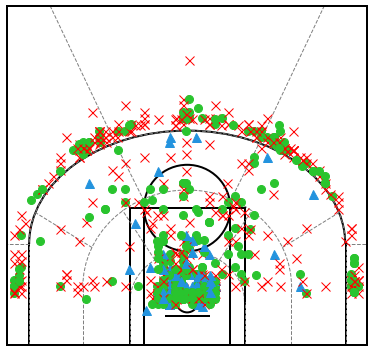

In [27]:
shots = offense_file['ovr_data']['shooting_locations']

off_PPP = data_PPP['Total PPP']['TOTAL']
off_total_SQ = data_PPP['Total SQ']['TOTAL']
off_shoot_TS = data_PPP['Shooting TS%']['TOTAL']
off_3pt_fg_per = data_PPP['Shooting 3pt FG%']['TOTAL']
off_3pt_SQ = data_PPP['Shooting 3pt SQ']['TOTAL']

off_FTR = data_PPP['Total FTR']['TOTAL']

off_rim_PPP = rim_PPP['Shooting PPP']['TOTAL']
off_rim_TS = rim_PPP['Shooting TS%']['TOTAL']
off_rim_SQ = rim_PPP['Shooting SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
nugg_off_fig = plt.figure(figsize=(5, 4.7))
nugg_off_ax = nugg_off_fig.add_axes([0, 0, 1, 1])
nugg_off_ax = create_court(nugg_off_ax, 'black')


for shot in shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        nugg_off_ax.plot(x,y, marker='o', color='#29c42e', markersize=8)
    if res == 0:
        nugg_off_ax.plot(x,y, marker='x', color='red', markersize=9)
    if res == 11: # Free Throws
        nugg_off_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
        '''
    if res == 20: # Turnovers
        nugg_off_ax.plot(x,y, marker='D', color='grey', markersize=6)
        '''
    if res == 30: # And-1
        nugg_off_ax.plot(x,y, marker='^', color='#2393de', markersize=9)

print(f'OFFENSE SHOT CHART')
print('--------------------------')
print(f'Total PPP: {off_PPP}')
print(f'Shooting TS%: {off_shoot_TS} on {off_total_SQ} SQ')
print(f'3pt FG %: {off_3pt_fg_per} on {off_3pt_SQ} SQ\n')

print(f'Total FTR: {off_FTR}\n')

print(f'Rim PPP: {off_rim_PPP}')
print(f'Rim TS%: {off_rim_TS} on {off_rim_SQ} SQ')
        
plt.show()

In [17]:
opp_PPP = opp_off_file['ovr_data']['data']
opp_PPP = pd.DataFrame(opp_PPP).transpose()
opp_PPP = PPP(opp_PPP)

opp_rim_PPP = opp_off_file['Rim']['data']
opp_rim_PPP = pd.DataFrame(opp_rim_PPP).transpose()
opp_rim_PPP = PPP(opp_rim_PPP)
opp_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.4,18.4,4,46.5,0.16,83.66,3.26,12,66.7,2.92,7,71.4,3.86,0.92,12.7,4,53.5,0.0,66.67,3.11,11,66.7,3.11,2,N/A,N/A,1.94,37.7,0,46.5,0.3,97.17,3.4,3,66.7,2.33,7,71.4,N/A
PNR Screener,1.14,6.0,1,50.8,0.33,65.41,3.33,3,66.7,3.0,3,33.3,3.67,1.03,3.8,0,49.2,0.67,51.55,3.0,2,50.0,2.0,1,0.0,5.0,1.25,13.3,1,50.8,0.0,83.33,3.67,2,100.0,5.0,2,50.0,5.0
DHO Ball Handler,1.88,6.1,0,37.5,0.0,93.75,3.62,5,60.0,3.6,3,100.0,3.67,1.2,4.9,0,62.5,0.0,60.0,3.6,5,60.0,3.6,0,N/A,N/A,3.0,10.0,0,37.5,0.0,150.0,3.67,0,N/A,N/A,3,100.0,N/A
DHO Screener,3.0,0.8,0,0.0,0.0,150.0,5.0,0,N/A,N/A,1,100.0,5.0,3.0,1.0,0,100.0,0.0,150.0,5.0,0,N/A,N/A,1,100.0,5.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,5.0
ISOLATION,0.84,18.8,2,16.1,0.09,45.89,2.77,18,44.4,2.61,4,25.0,3.5,0.86,20.5,2,83.9,0.11,47.67,2.61,18,44.4,2.61,2,N/A,N/A,0.75,13.3,0,16.1,0.0,37.5,3.5,0,N/A,N/A,4,25.0,N/A
TRANSITION,1.39,10.9,1,20.8,0.08,76.92,3.46,9,77.8,3.44,4,50.0,3.5,1.31,11.2,1,79.2,0.1,75.0,3.3,9,75.0,3.25,2,50.0,3.5,1.67,10.0,0,20.8,0.0,83.33,4.0,1,100.0,5.0,2,50.0,3.5
Attacking Closeouts,0.95,12.8,0,29.6,0.12,47.39,3.75,10,40.0,3.7,6,33.3,3.83,1.35,11.6,0,70.4,0.18,67.34,3.45,8,50.0,3.38,3,66.7,3.67,0.0,16.7,0,29.6,0.0,0.0,4.4,2,0.0,5.0,3,0.0,3.67
Catch & Shoot,1.22,15.5,0,0.0,0.05,61.15,3.6,0,N/A,N/A,20,40.0,3.6,1.22,20.0,0,100.0,0.05,61.15,3.6,0,N/A,N/A,20,40.0,3.6,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.6
Off Ball Screens,1.16,3.3,2,0.0,3.0,132.98,3.0,0,N/A,N/A,1,100.0,3.0,1.16,4.2,2,100.0,3.0,132.98,3.0,1,N/A,N/A,3,100.0,3.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.0
Cutting,0.4,3.8,2,0.0,0.0,33.33,5.0,3,33.3,5.0,0,N/A,N/A,0.4,4.9,2,100.0,0.0,33.33,5.0,5,33.3,5.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


OPPONENT OFFENSE SHOT CHART
--------------------------
Total PPP: 1.2
True Shooting %: 63.85 on 3.37 SQ
3pt FG %: 46.4 on 3.68 SQ

Total FTR: 0.14

Rim PPP: 1.22
Rim TS%: 65.29 on 3.17 SQ


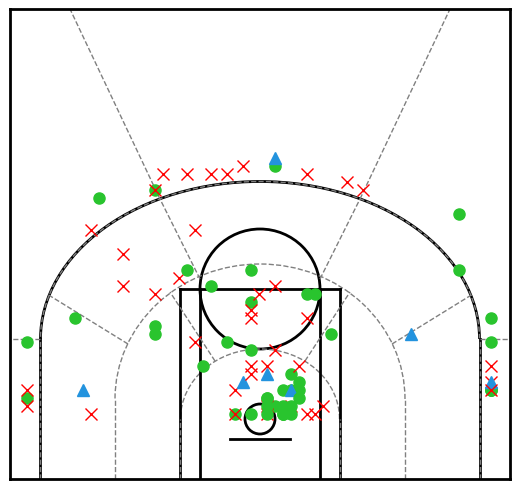

In [13]:
opp_shots = opp_off_file['ovr_data']['shooting_locations']

opp_off_PPP = opp_PPP['Total PPP']['TOTAL']
opp_total_SQ = opp_PPP['Total SQ']['TOTAL']
opp_shoot_TS = opp_PPP['Shooting TS%']['TOTAL']
opp_3pt_fg_per = opp_PPP['Shooting 3pt FG%']['TOTAL']
opp_3pt_SQ = opp_PPP['Shooting 3pt SQ']['TOTAL']

opp_FTR = opp_PPP['Total FTR']['TOTAL']

opp_off_rim_PPP = opp_rim_PPP['Shooting PPP']['TOTAL']
opp_rim_TS = opp_rim_PPP['Shooting TS%']['TOTAL']
opp_rim_SQ = opp_rim_PPP['Shooting SQ']['TOTAL']


# Draw basketball court
opp_fig = plt.figure(figsize=(5, 4.7))
opp_ax = opp_fig.add_axes([0, 0, 1, 1])
opp_ax = create_court(opp_ax, 'black')

for shot in opp_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        opp_ax.plot(x,y, marker='o', color='#29c42e', markersize=8)
    if res == 0:
        opp_ax.plot(x,y, marker='x', color='red', markersize=9)
    if res == 11: # Free Throws
        opp_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
        '''
    if res == 20: # Turnovers
        opp_ax.plot(x,y, marker='D', color='grey', markersize=6)
        '''
    if res == 30: # And-1
        opp_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
    
print(f'OPPONENT OFFENSE SHOT CHART')
print('--------------------------')
print(f'Total PPP: {opp_off_PPP}')
print(f'True Shooting %: {opp_shoot_TS} on {opp_total_SQ} SQ')
print(f'3pt FG %: {opp_3pt_fg_per} on {opp_3pt_SQ} SQ\n')

print(f'Total FTR: {opp_FTR}\n')

print(f'Rim PPP: {opp_off_rim_PPP}')
print(f'Rim TS%: {opp_rim_TS} on {opp_rim_SQ} SQ')

plt.show()

In [22]:
player_PPP = player_off_file['ovr_data']['data']
player_PPP = pd.DataFrame(player_PPP).transpose()
player_PPP = PPP(player_PPP)

player_rim_PPP = player_off_file['Rim']['data']
player_rim_PPP = pd.DataFrame(player_rim_PPP).transpose()
player_rim_PPP = PPP(player_rim_PPP)
player_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.53,39.5,3,40.0,0.0,95.83,3.58,8,87.5,3.0,4,75.0,4.75,1.11,32.1,3,60.0,0.0,83.33,3.0,8,83.3,3.0,1,N/A,N/A,2.17,60.0,0,40.0,0.0,108.33,4.17,2,100.0,3.0,4,75.0,N/A
PNR Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,1.0,5.3,0,0.0,0.0,50.0,3.0,2,50.0,3.0,0,N/A,N/A,1.0,7.1,0,100.0,0.0,50.0,3.0,2,50.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,1.11,26.0,2,20.2,0.29,69.8,3.14,5,60.0,3.0,2,50.0,3.5,1.02,28.1,2,79.8,0.4,68.03,3.0,5,60.0,3.0,2,N/A,N/A,1.5,20.0,0,20.2,0.0,75.0,3.5,0,N/A,N/A,2,50.0,N/A
TRANSITION,1.25,10.5,0,25.0,0.0,62.5,2.75,3,33.3,2.33,1,100.0,4.0,0.67,10.7,0,75.0,0.0,33.33,2.33,3,33.3,2.33,0,N/A,N/A,3.0,10.0,0,25.0,0.0,150.0,4.0,0,N/A,N/A,1,100.0,N/A
Attacking Closeouts,0.0,5.3,0,50.0,0.0,0.0,3.5,1,0.0,3.0,1,0.0,4.0,0.0,3.6,0,50.0,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A,0.0,10.0,0,50.0,0.0,0.0,4.0,0,N/A,N/A,1,0.0,N/A
Catch & Shoot,0.0,10.5,0,0.0,0.0,0.0,3.25,0,N/A,N/A,4,0.0,3.25,0.0,14.3,0,100.0,0.0,0.0,3.25,0,N/A,N/A,4,0.0,3.25,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.25
Off Ball Screens,0.0,2.6,1,0.0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,0.0,3.6,1,100.0,0.0,N/A,N/A,0,N/A,N/A,1,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,0.0,2.6,1,0.0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,0.0,3.6,1,100.0,0.0,N/A,N/A,1,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


INGRAM OVR TEAM SHOT CHART
---------------------------
Total PPP: 1.05
Total TS%: 64.3 on 3.29 SQ
Total 3pt%: 0.0 on 3.92 SQ

Total FTR: 0.1

Rim PPP: 1.43
Rim TS%: 83.33 on 3.33 SQ


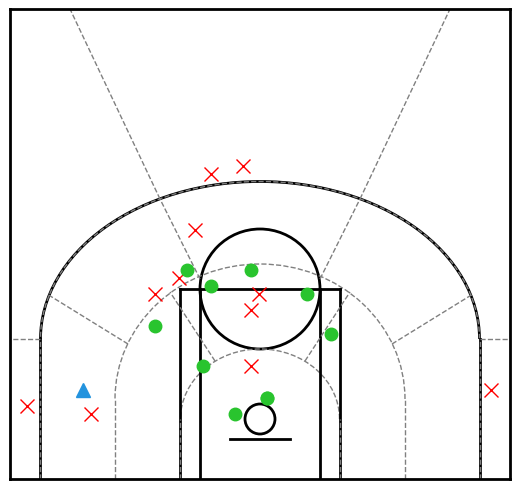

In [26]:
player_shots = player_off_file['ovr_data']['shooting_locations']

player_total_PPP = player_PPP['Total PPP']['TOTAL']
player_ovr_ts_per = player_PPP['Total TS%']['TOTAL']
player_ovr_3pt_per = player_PPP['Shooting 3pt FG%']['TOTAL']
player_ovr_SQ = player_PPP['Total SQ']['TOTAL']
player_ovr_3pt_SQ = player_PPP['Total 3pt SQ']['TOTAL']

player_ovr_ftr = player_PPP['Shooting FTR']['TOTAL']

player_rim_total_PPP = player_rim_PPP['Total PPP']['TOTAL']
player_rim_ts_per = player_rim_PPP['Total TS%']['TOTAL']
player_rim_SQ = player_rim_PPP['Total SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

for shot in player_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        ax.plot(x,y, marker='x', color='red', markersize=10)
    if res == 11: # Free Throws
        ax.plot(x,y, marker='^', color='#2393de', markersize=10)
        '''
    if res == 20: # Turnovers
        ax.plot(x,y, marker='D', color='#f5c133', markersize=8)
        '''
    if res == 30: # And-1
        ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    
print('INGRAM OVR TEAM SHOT CHART')
print('---------------------------')
print(f'Total PPP: {player_total_PPP}')
print(f'Total TS%: {player_ovr_ts_per} on {player_ovr_SQ} SQ')
print(f'Total 3pt%: {player_ovr_3pt_per} on {player_ovr_3pt_SQ} SQ\n')
print(f'Total FTR: {player_ovr_ftr}\n')
print(f'Rim PPP: {player_rim_total_PPP}')
print(f'Rim TS%: {player_rim_ts_per} on {player_rim_SQ} SQ')
        
plt.show()

In [57]:
player_def_PPP = player_def_file['ovr_data']['data']
player_def_PPP = pd.DataFrame(player_def_PPP).transpose()
player_def_PPP = defense_PPP(player_def_PPP)

player_def_rim_PPP = player_def_file['Rim']['data']
player_def_rim_PPP = pd.DataFrame(player_def_rim_PPP).transpose()
player_def_rim_PPP = defense_PPP(player_def_rim_PPP)
player_def_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.0,14.3,1,0.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A,1.0,15.4,1,100.0,0.0,100.0,5.0,2,100.0,5.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
PNR Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,2.0,14.3,0,0.0,0.0,100.0,5.0,2,100.0,5.0,0,N/A,N/A,2.0,15.4,0,100.0,0.0,100.0,5.0,2,100.0,5.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,0.4,35.7,0,20.0,0.0,20.0,2.0,5,20.0,2.0,0,N/A,N/A,0.5,30.8,0,80.0,0.0,25.0,2.25,4,25.0,2.25,0,N/A,N/A,0.0,100.0,0,20.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A
TRANSITION,0.0,14.3,1,0.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A,0.0,15.4,1,100.0,0.0,0.0,1.0,2,0.0,1.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Attacking Closeouts,2.0,14.3,0,0.0,0.0,100.0,4.0,2,100.0,4.0,0,N/A,N/A,2.0,15.4,0,100.0,0.0,100.0,4.0,2,100.0,4.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Catch & Shoot,0.0,7.1,0,0.0,0.0,0.0,3.0,0,N/A,N/A,1,0.0,3.0,0.0,7.7,0,100.0,0.0,0.0,3.0,0,N/A,N/A,1,0.0,3.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.0
Off Ball Screens,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


KCP OVR DEFENSE SHOT CHART
---------------------------
Total PPP: 0.86
Total TS%: 50.0 on 3.08 SQ
Total 3pt%: 0.0 on 3.0 SQ

Total FTR: 0.0

Rim PPP: 0.86
Rim TS%: 42.86 on 2.86 SQ


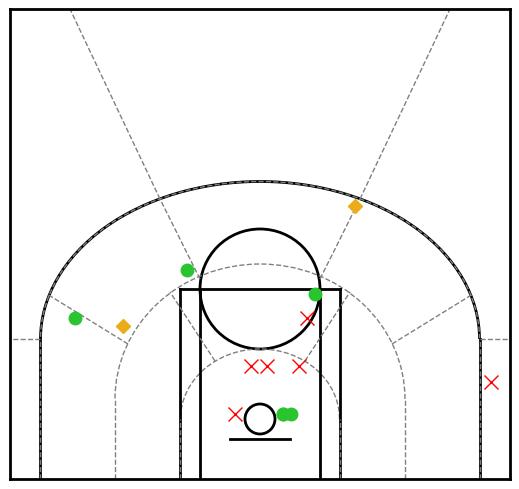

In [58]:
player_def_shots = player_def_file['ovr_data']['shooting_locations']

player_def_total_PPP = player_def_PPP['Total PPP']['TOTAL']
player_def_ovr_ts_per = player_def_PPP['Total TS%']['TOTAL']
player_def_ovr_3pt_per = player_def_PPP['Shooting 3pt FG%']['TOTAL']
player_def_ovr_SQ = player_def_PPP['Total SQ']['TOTAL']
player_def_ovr_3pt_SQ = player_def_PPP['Total 3pt SQ']['TOTAL']

player_def_ovr_ftr = player_def_PPP['Shooting FTR']['TOTAL']

player_def_rim_total_PPP = player_def_rim_PPP['Total PPP']['TOTAL']
player_def_rim_ts_per = player_def_rim_PPP['Total TS%']['TOTAL']
player_def_rim_SQ = player_def_rim_PPP['Total SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

for shot in player_def_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        ax.plot(x,y, marker='x', color='red', markersize=10)
    if res == 11: # Free Throws
        ax.plot(x,y, marker='^', color='#2393de', markersize=10)
    if res == 20: # Turnovers
        ax.plot(x,y, marker='D', color='#ebac1a', markersize=7)
    if res == 30: # And-1
        ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    
print('KCP OVR DEFENSE SHOT CHART')
print('---------------------------')
print(f'Total PPP: {player_def_total_PPP}')
print(f'Total TS%: {player_def_ovr_ts_per} on {player_def_ovr_SQ} SQ')
print(f'Total 3pt%: {player_def_ovr_3pt_per} on {player_def_ovr_3pt_SQ} SQ\n')
print(f'Total FTR: {player_def_ovr_ftr}\n')
print(f'Rim PPP: {player_def_rim_total_PPP}')
print(f'Rim TS%: {player_def_rim_ts_per} on {player_def_rim_SQ} SQ')
        
plt.show()